In [3]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../targeted-lost_*.csv')]
data = pd.concat(frames, ignore_index=True)

def classify(r):
    if r['fragment_k'] == 1:
        return "Kademlia"
    else:
        return "Entropy$_{(" + str(int(r['chunk_n'])) + ", 8)}$"

data['Protocol'] = data.apply(classify, axis=1)
data['targeted_portion'] = data['targeted'] / (100 * 1000)
data

,churn_rate,node_count,duration,faulty_rate,object_count,chunk_n,chunk_k,fragment_n,fragment_k,cache_sec,targeted_count,data_lost,targeted,repair,alive_count,Protocol,targeted_portion
0,4,100000,315360000,0,100,100,100,3,1,4294967295,700,100,2083,12009.61,3,Kademlia,0.02083
1,4,100000,315360000,0,100,100,100,3,1,4294967295,0,0,0,11989.27,3,Kademlia,0.00000
2,4,100000,315360000,0,100,100,100,3,1,4294967295,600,100,1778,11994.06,3,Kademlia,0.01778
3,4,100000,315360000,0,100,100,100,3,1,4294967295,550,100,1633,12011.29,3,Kademlia,0.01633
4,4,100000,315360000,0,100,100,100,3,1,4294967295,850,100,2528,12018.46,3,Kademlia,0.02528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4,100000,315360000,0,100,12,8,80,32,0,450,50,30199,963680.00,80,"Entropy$_{(12, 8)}$",0.30199
796,4,100000,315360000,0,100,12,8,80,32,0,850,99,49284,963595.50,77,"Entropy$_{(12, 8)}$",0.49284
797,4,100000,315360000,0,100,12,8,80,32,0,450,48,30145,963680.75,80,"Entropy$_{(12, 8)}$",0.30145
798,4,100000,315360000,0,100,12,8,80,32,0,450,49,30327,963662.50,80,"Entropy$_{(12, 8)}$",0.30327


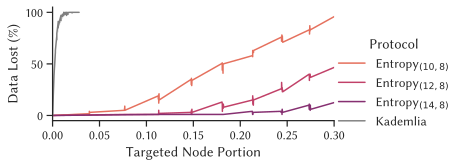

In [6]:
palette = sns.color_palette('flare', n_colors=3)
sns.relplot(data=data, 
    kind="line",
    x="targeted_portion", y="data_lost", hue="Protocol",
    hue_order=['Entropy$_{(10, 8)}$', 'Entropy$_{(12, 8)}$', 'Entropy$_{(14, 8)}$', 'Kademlia'],
    palette=[*palette, 'gray'],
    height=2.56, aspect=2.) \
.set_xlabels("Targeted Node Portion") \
.set_ylabels("Data Lost (%)") \
.set(xlim=(0, 0.3)) \
.savefig("../targeted-lost.pdf")